In [1]:
%cd /global/home/users/yifengh3/VAE/EMD_VAE
%load_ext autoreload
%autoreload 2

/global/home/users/yifengh3/VAE/EMD_VAE


In [2]:
from sample_and_analysis import VAE_sampler

1 Physical GPUs, 1 Logical GPU
INFO:tensorflow:Using MirroredStrategy with devices ('/device:GPU:0',)
INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:GPU:0',), communication = CommunicationImplementation.AUTO


# Sample from the validation data

In [3]:
original_data_sampler = VAE_sampler("/global/home/users/yifengh3/VAE/data/B_background.h5",
                     "/global/home/users/yifengh3/VAE/B_results/method2_beta2",
                    train_valid_split=800000)

(1000000, 150)
Memory in GB: 2.250075340270996
Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
Model: "VAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 50, 4)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 50, 1024)     5120        inputs[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 50, 1024)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 50, 1024)     1049600 

vae input size: (200000, 50, 4)
validation data size: (200000, 50, 3)
sampling data
getting plot 1 out of 6


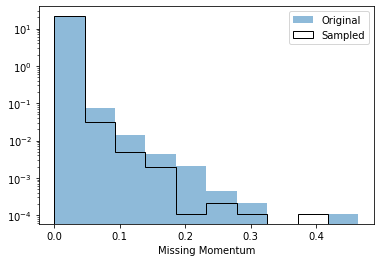

getting plot 2 out of 6
clustering jets with paramert ptmin=0.1


100%|██████████| 200000/200000 [00:31<00:00, 6304.01it/s]


clustering jets with paramert ptmin=0.1


100%|██████████| 200000/200000 [00:35<00:00, 5703.30it/s]


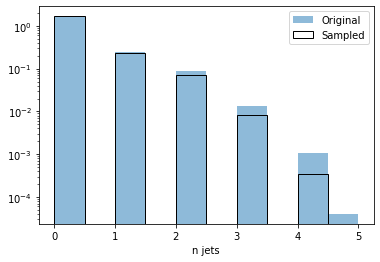

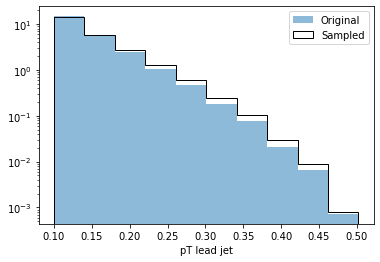

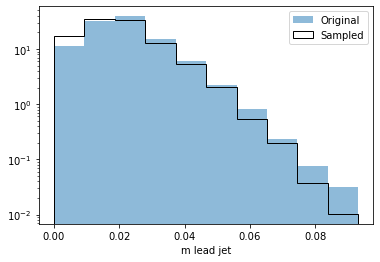

getting plot 3 out of 6


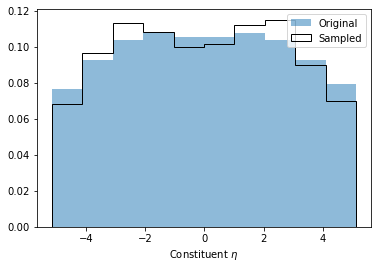

getting plot 4 out of 6


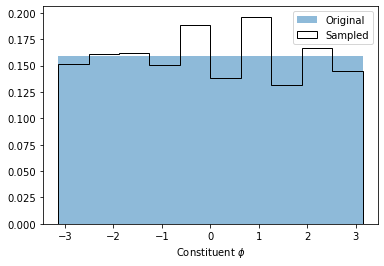

getting plot 5 out of 6


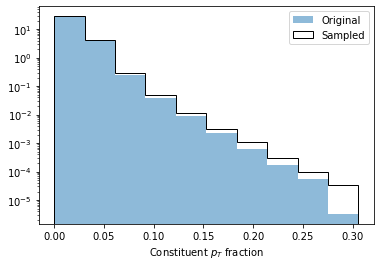

getting plot 6 out of 6


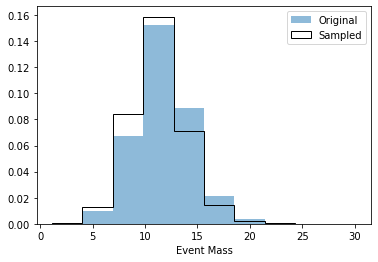

In [48]:
background_input, background_output, outjets_background, background_ht = original_data_sampler.run_analysis(
    "/global/home/users/yifengh3/VAE/B_results/method2_beta2/end_beta_checkpoint/model_weights_end_1414_3.2e-02.hdf5",
    number_of_sampling=1,
    stop_index=None,
    out_plot_prefix="/global/home/users/yifengh3/VAE/sampled_plot")

# B signal sample

In [5]:
b_signal_sampler = VAE_sampler("/global/home/users/yifengh3/VAE/data/B_signal.h5",
                     "/global/home/users/yifengh3/VAE/B_results/method2_beta2")

(50000, 150)
Memory in GB: 0.1125037670135498
Model: "VAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 50, 4)]      0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 50, 1024)     5120        inputs[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_13 (LeakyReLU)      (None, 50, 1024)     0           conv1d_4[0][0]                   
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 50, 1024)     1049600     leaky_re_lu_13[0][0]             
__________________________________________________

vae input size: (50000, 50, 4)
validation data size: (50000, 50, 3)
sampling data
getting plot 1 out of 6


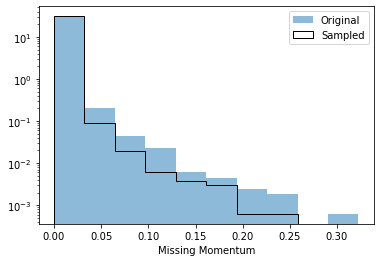

getting plot 2 out of 6
clustering jets


100%|██████████| 50000/50000 [00:07<00:00, 6298.61it/s]


clustering jets


100%|██████████| 50000/50000 [00:08<00:00, 5661.36it/s]


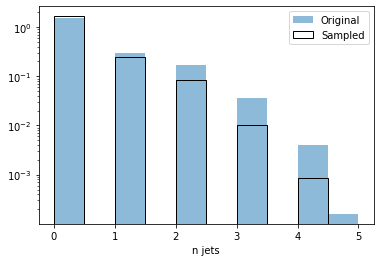

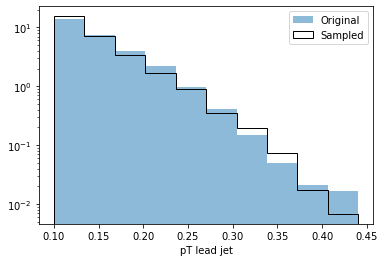

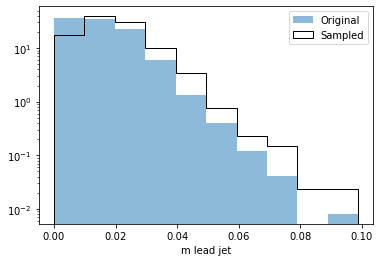

getting plot 3 out of 6


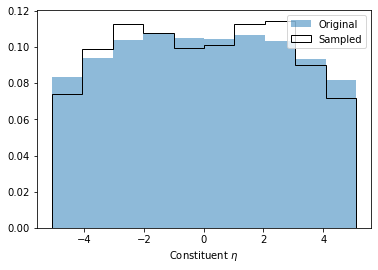

getting plot 4 out of 6


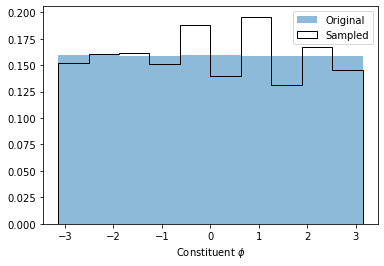

getting plot 5 out of 6


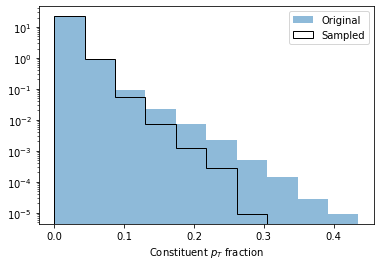

getting plot 6 out of 6


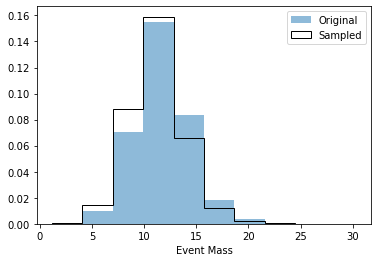

In [6]:
b_input, b_output, b_outjets, b_ht = b_signal_sampler.run_analysis(
    "/global/home/users/yifengh3/VAE/B_results/method2_beta2/end_beta_checkpoint/model_weights_end_1414_3.2e-02.hdf5",
    number_of_sampling=1,
    stop_index=None,)

# H signal sample

In [7]:
h_signal_sampler = VAE_sampler("/global/home/users/yifengh3/VAE/data/h_signal.h5",
                     "/global/home/users/yifengh3/VAE/B_results/method2_beta2")

(50000, 150)
Memory in GB: 0.1125037670135498
Model: "VAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 50, 4)]      0                                            
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 50, 1024)     5120        inputs[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_26 (LeakyReLU)      (None, 50, 1024)     0           conv1d_8[0][0]                   
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 50, 1024)     1049600     leaky_re_lu_26[0][0]             
__________________________________________________

vae input size: (50000, 50, 4)
validation data size: (50000, 50, 3)
sampling data
getting plot 1 out of 6


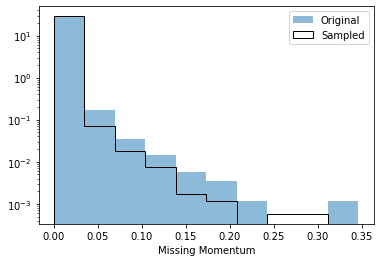

getting plot 2 out of 6
clustering jets


100%|██████████| 50000/50000 [00:08<00:00, 6209.44it/s]


clustering jets


100%|██████████| 50000/50000 [00:08<00:00, 5647.64it/s]


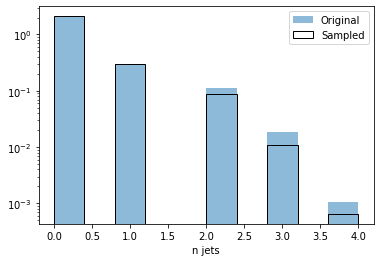

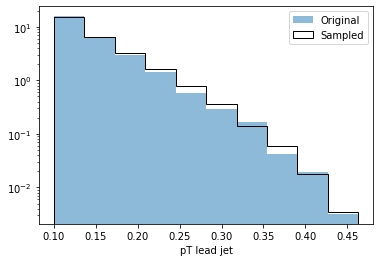

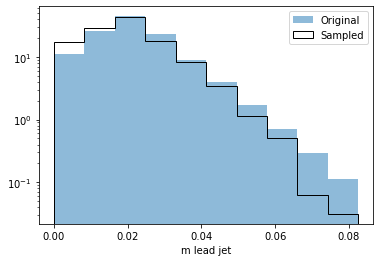

getting plot 3 out of 6


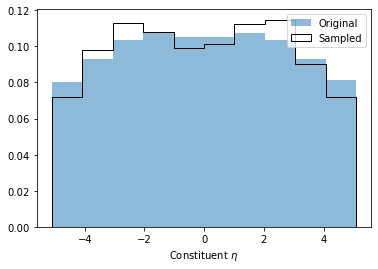

getting plot 4 out of 6


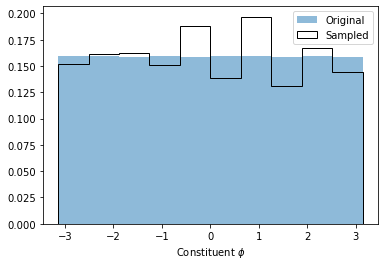

getting plot 5 out of 6


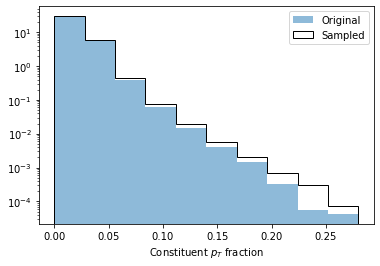

getting plot 6 out of 6


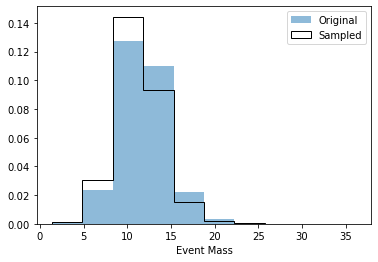

In [8]:
h_input, h_output, h_outjets, h_ht = h_signal_sampler.run_analysis(
    "/global/home/users/yifengh3/VAE/B_results/method2_beta2/end_beta_checkpoint/model_weights_end_1414_3.2e-02.hdf5",
    number_of_sampling=1,
    stop_index=None)

# HV signal sample

In [9]:
hv_signal_sampler = VAE_sampler("/global/home/users/yifengh3/VAE/data/hv_signal.h5",
                     "/global/home/users/yifengh3/VAE/B_results/method2_beta2")

(50000, 150)
Memory in GB: 0.1125037670135498
Model: "VAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 50, 4)]      0                                            
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 50, 1024)     5120        inputs[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_39 (LeakyReLU)      (None, 50, 1024)     0           conv1d_12[0][0]                  
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 50, 1024)     1049600     leaky_re_lu_39[0][0]             
__________________________________________________

vae input size: (50000, 50, 4)
validation data size: (50000, 50, 3)
sampling data
getting plot 1 out of 6


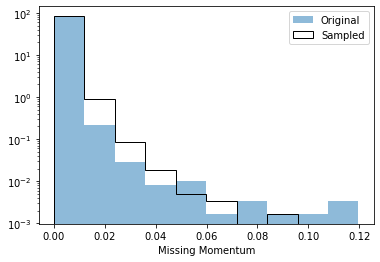

getting plot 2 out of 6
clustering jets


100%|██████████| 50000/50000 [00:08<00:00, 6144.32it/s]


clustering jets


100%|██████████| 50000/50000 [00:09<00:00, 5548.07it/s]


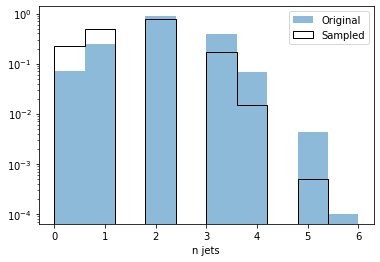

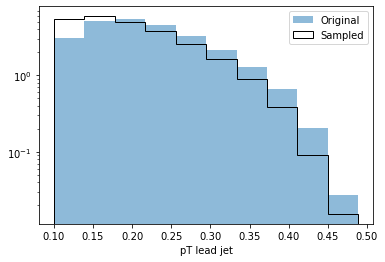

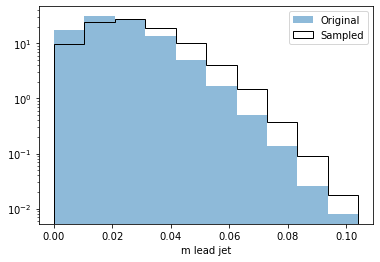

getting plot 3 out of 6


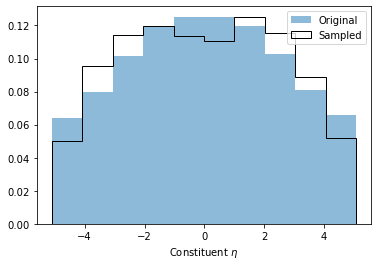

getting plot 4 out of 6


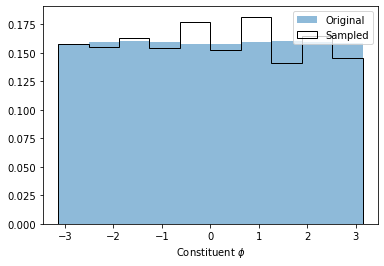

getting plot 5 out of 6


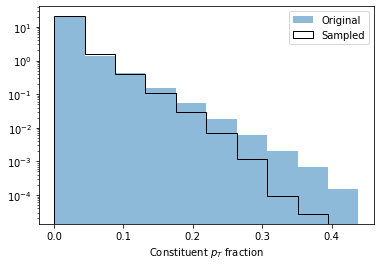

getting plot 6 out of 6


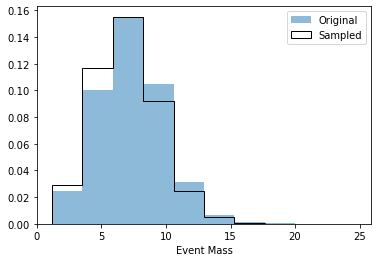

In [10]:
hv_input, hv_output, hv_outjets, hv_ht = hv_signal_sampler.run_analysis(
    "/global/home/users/yifengh3/VAE/B_results/method2_beta2/end_beta_checkpoint/model_weights_end_1414_3.2e-02.hdf5",
    number_of_sampling=1,
    stop_index=None)

# Signal/Background Compare

getting plot 1 out of 6


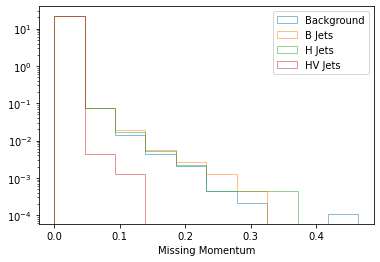

getting plot 2 out of 6
clustering jets


100%|██████████| 200000/200000 [00:32<00:00, 6161.56it/s]


clustering jets


100%|██████████| 50000/50000 [00:08<00:00, 6208.99it/s]


clustering jets


100%|██████████| 50000/50000 [00:08<00:00, 6229.13it/s]


clustering jets


100%|██████████| 50000/50000 [00:08<00:00, 6061.55it/s]


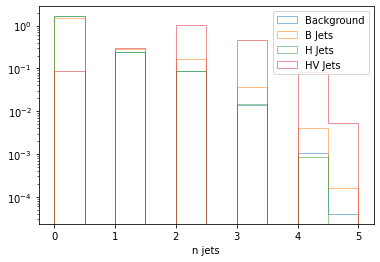

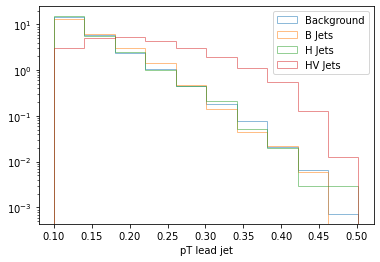

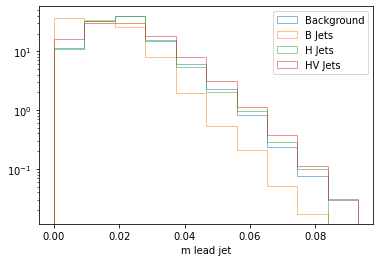

getting plot 3 out of 6


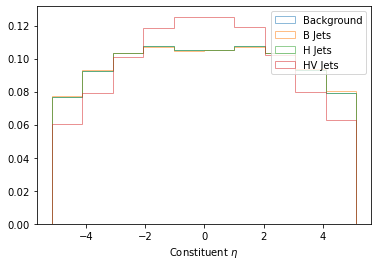

getting plot 4 out of 6


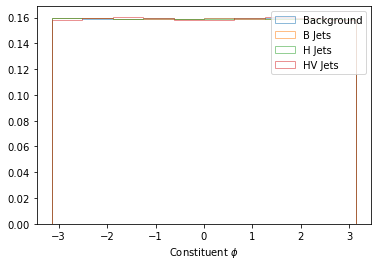

getting plot 5 out of 6


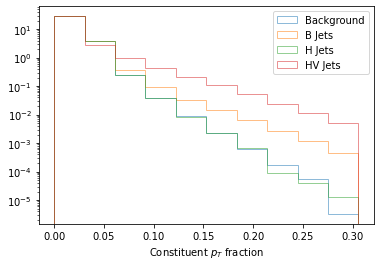

getting plot 6 out of 6


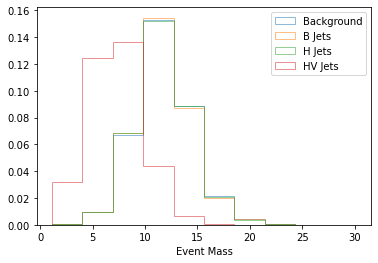

In [11]:
plotting_method_name = \
            [method for method in dir(VAE_sampler) if method.startswith('_VAE_sampler__plots')]
plotting_function = [eval("VAE_sampler."+func_name) for func_name in plotting_method_name]
call_args = [background_output, b_output, None]
call_kargs = {"additional_signal":[h_output,hv_output], "data_name":["Background","B Jets","H Jets","HV Jets"]}
for count,func in enumerate(plotting_function):
    print("getting plot {} out of {}".format(count+1,len(plotting_function)))
    func(*call_args,**call_kargs)

# Signal/Background Compare (with HT restored)

In [12]:
import numpy as np
def recover_pt_info(data, ht):
    new_data = np.array(data)
    new_data[:,:,0] = new_data[:,:,0]*ht[:,None]
    return new_data

getting plot 1 out of 6


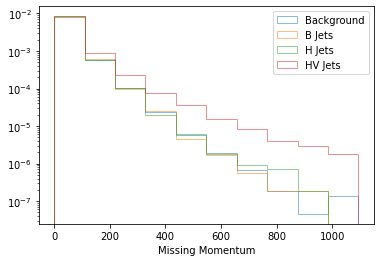

getting plot 2 out of 6
Alert: using customized argument: ptmin = 5
clustering jets with paramert ptmin=5


100%|██████████| 200000/200000 [00:32<00:00, 6203.35it/s]


clustering jets with paramert ptmin=5


100%|██████████| 50000/50000 [00:08<00:00, 6189.13it/s]


clustering jets with paramert ptmin=5


100%|██████████| 50000/50000 [00:08<00:00, 6198.27it/s]


clustering jets with paramert ptmin=5


100%|██████████| 50000/50000 [00:08<00:00, 6017.28it/s]


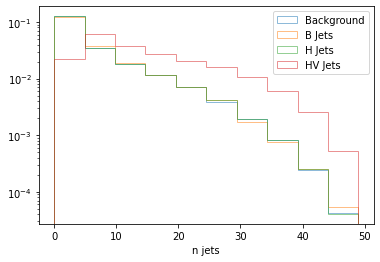

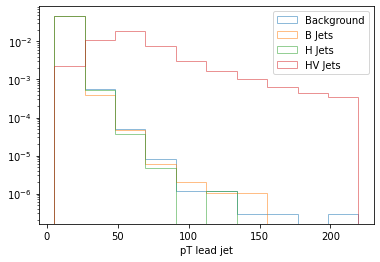

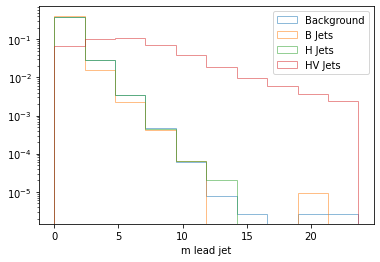

getting plot 3 out of 6


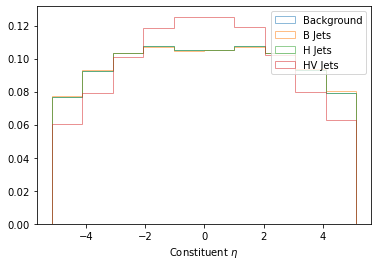

getting plot 4 out of 6


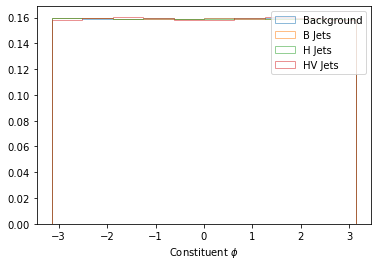

getting plot 5 out of 6


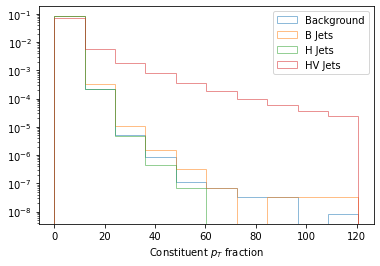

getting plot 6 out of 6


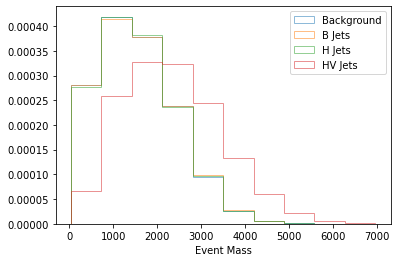

In [49]:
plotting_method_name = \
            [method for method in dir(VAE_sampler) if method.startswith('_VAE_sampler__plots')]
plotting_function = [eval("VAE_sampler."+func_name) for func_name in plotting_method_name]
call_args = [recover_pt_info(background_output,background_ht[800000:]), recover_pt_info(b_output,b_ht), 
             "/global/home/users/yifengh3/VAE/data/data_plots"]
call_kargs = {"additional_signal":[recover_pt_info(h_output,h_ht),recover_pt_info(hv_output,hv_ht)], "data_name":["Background","B Jets","H Jets","HV Jets"]}
for count,func in enumerate(plotting_function):
    print("getting plot {} out of {}".format(count+1,len(plotting_function)))
    func(*call_args,**call_kargs,ptmin=5)